<a href="https://colab.research.google.com/github/Ayat30/datamining/blob/main/churn_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd #powerful data analysis and manipulation
import numpy as np
import missingno as msno #visualization of missing value
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score

In [ ]:
#loading data
from google.colab import files   
uploaded = files.upload()

Saving Telco-Customer-Churn(1).csv to Telco-Customer-Churn(1).csv


In [23]:
df = pd.read_csv('/content/Telco-Customer-Churn(1).csv')

In [24]:
df.head(5)

,CustomerID,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

In [27]:
df = df.drop(['CustomerID'], axis = 1)
df.head()

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

Gender              0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

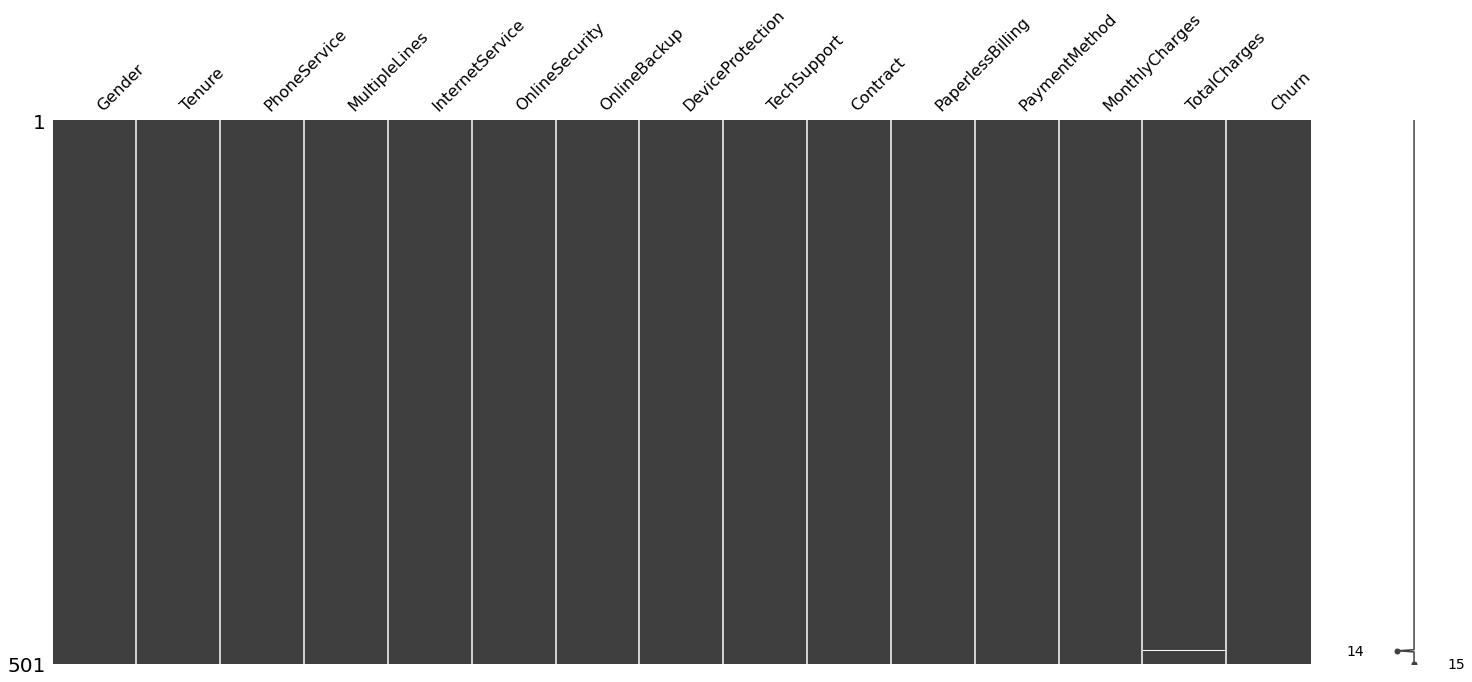

In [29]:
# Visualize missing values as a matrix
msno.matrix(df)

In [30]:
df.fillna(df["TotalCharges"].mean())

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Male,28,Yes,No,DSL,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,60.90,1785.65,No
497,Female,70,Yes,No,No,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No
498,Female,5,No,No phone service,DSL,No,Yes,No,No,Month-to-month,No,Electronic check,28.45,131.05,Yes
499,Female,12,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),99.70,1238.45,Yes


In [31]:
df.isnull().sum()

Gender              0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
Churn               0
dtype: int64

In [32]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,501.000000,501.000000,500.000000
mean,31.459082,66.074251,2226.765400
std,24.391327,29.610242,2197.830553
min,0.000000,18.950000,19.150000
25%,8.000000,44.300000,421.700000
50%,28.000000,71.900000,1368.675000
75%,52.000000,90.050000,3588.200000
max,72.000000,116.250000,8468.200000


In [33]:
df["InternetService"].describe(include=['object', 'bool'])

count             501
unique              3
top       Fiber optic
freq              228
Name: InternetService, dtype: object

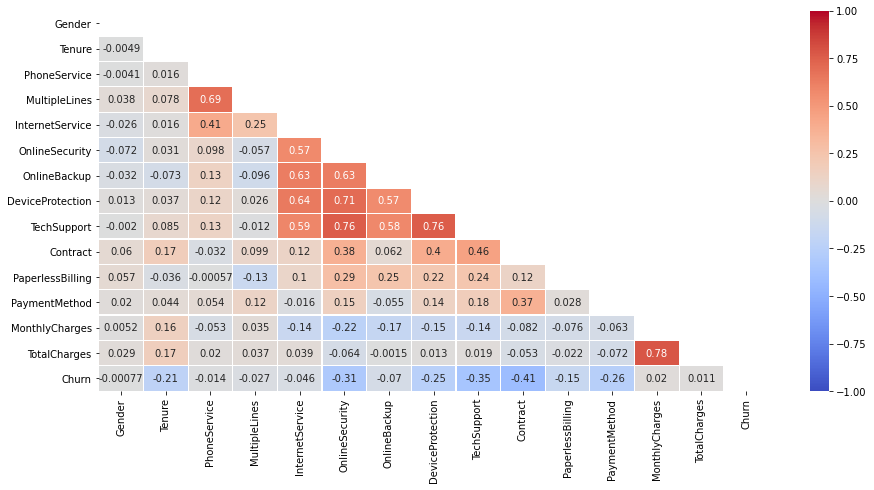

In [34]:
plt.figure(figsize=(15, 7))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [35]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head(5)

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,1,34,1,0,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,1,2,1,0,0,2,2,0,0,0,1,3,53.85,108.15,1
3,1,45,0,1,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,2,1,0,1,0,0,0,0,0,1,2,70.70,151.65,1


In [36]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values.astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)
X_train = X_train.fillna(X_train.mean())

In [37]:
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(5,2))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

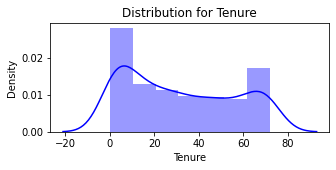

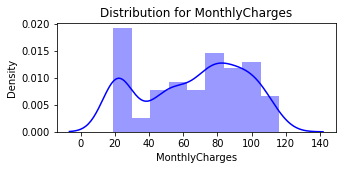

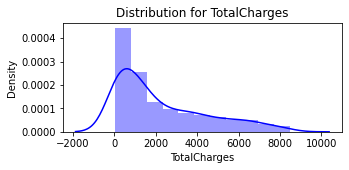

In [38]:
num_cols = ["Tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = 10) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7682119205298014


In [40]:
svc_model = SVC(random_state = 5)
svc_model.fit(X_train,y_train)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7417218543046358


In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7350993377483444
